In [4]:
# modules import
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [5]:
## Open Data

# ice shelf mask file (0 for grounded, 1 for ocean, isf ID for ice shelves)
netCDF_mask_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/isf_mask_AMUXL025_BedMachineAntarctica-2020-07-15_v02.nc'
Mask = xr.open_mfdataset(netCDF_mask_file) 
Mask = Mask.rename_dims({'lat' : 'y', 'lon' : 'x'}) # change name (lat,lon in x,y)
Mask_final = xr.where(Mask.isfmask>1, 1000, Mask) # set 1000 for ice shelf
Mask_final = xr.where(Mask.isfmask<0, 0, Mask_final)  #  and 0 instead
data1 = np.array(Mask_final['isfmask'].where(Mask.isfmask>1)) # for plotting the iceshelves
data2 = Mask_final.isfmask.where(Mask_final.isfmask==0) # for plotting the grounding area
data3 = Mask_final.isfmask # for plotting contour

# grid file
netCDF_grid_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/mesh_mask_AMUXL025_BedMachineAntarctica-2020-07-15_v02_ICB380.nc'
Grid = xr.open_mfdataset(netCDF_grid_file).squeeze()
data4 = Grid.tmask.where(Grid.tmask==0).isel(z=0) # for plotting the iceberg

# bathymetry file
netCDF_bathy_file = '/Users/jcaillet/Documents/nemo/AMUXL025/OTHERS/bathy_meter_AMUXL025_BedMachineAntarctica-2020-07-15_v02_ICB380.nc'
bathy = xr.open_mfdataset(netCDF_bathy_file) 
data = np.array(bathy['Bathymetry_isf']) # for plotting the bathymetry

# image in the left corner
Ant = mpimg.imread('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/essai8.png')

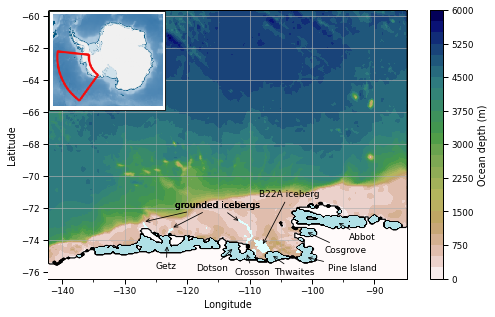

In [6]:
sns.set_context('paper')

# coordinates
X = np.array(bathy['nav_lon'])
Y = np.array(bathy['nav_lat'])

## figure
f = plt.figure(figsize = (7.09, 4.5))
ax={}
nb_rows = 1
nb_cols = 1
k=1
ax[k] = f.add_subplot(nb_rows,nb_cols, k)

# plot bathymetry
cax = ax[k].contourf(X, Y, data, vmin = 0, vmax=6000, levels = 26,  cmap='gist_earth_r', zorder=1)
cbar = f.colorbar(cax)
cbar.set_label(label='Ocean depth (m)')
# plot ice shelves
cax1 = ax[k].contourf(X, Y, data1,  colors = 'powderblue', zorder=6)
# plot grounded area
cax2 = ax[k].contourf(X, Y, data2,  colors = 'snow', zorder=3)
# plot icebergs
cax6 = ax[k].contourf(X, Y, data4,  colors = 'lightcyan', zorder=2)
# plot contour
cax3 = ax[k].contour(X, Y, data3, colors = 'black', zorder=5)

# add image
imagebox = OffsetImage(Ant, zoom=0.6)
ab = AnnotationBbox(imagebox, (-132.8, -62.8), zorder=10)
ax[k].add_artist(ab)

# add text
ax[k].annotate('Getz', xy=(-123.2, -74.3), xytext=(-125, -75.8), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Dotson', xy=(-112.5, -74.5), xytext=(-118.5, -75.9), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Crosson', xy=(-110.5, -74.8), xytext=(-112.4, -76.15), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Thwaites', xy=(-106.5, -74.95), xytext=(-106, -76.15), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Pine Island', xy=(-101, -75.1), xytext=(-97.5, -75.95), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Cosgrove', xy=(-101, -73.5), xytext=(-98, -74.8), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('Abbot', xy=(-96, -72.9), xytext=(-94, -74), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('grounded icebergs', xy=(-111.5, -72.9), xytext=(-122, -72), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='white'), zorder = 7)
ax[k].annotate('grounded icebergs', xy=(-122.5, -73.3), xytext=(-122, -72), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='white'), zorder = 7)
ax[k].annotate('grounded icebergs', xy=(-127.0, -72.9), xytext=(-122, -72), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)
ax[k].annotate('B22A iceberg', xy=(-108, -74.4), xytext=(-108.5, -71.3), fontsize=9, arrowprops=dict(arrowstyle="->", facecolor='black'), zorder = 7)

# add labels
majorx_ticks = np.arange(-150, -80, 10)
minorx_ticks = np.arange(-145, -85, 10)
ax[k].set_xticks(majorx_ticks)
ax[k].set_xticks(minorx_ticks, minor=True)
ax[k].grid(which='both')
ax[k].grid(which='minor', alpha=0.4)
ax[k].grid(which='major', alpha=0.8)
ax[k].set_xlim(bathy['nav_lon'].min(), bathy['nav_lon'].max())
ax[k].set_xlabel('Longitude')
ax[k].set_ylabel('Latitude')
        
plt.tight_layout()

# save figure
plt.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/general.pdf')
